# Импорты библиотек

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Чтение данных

In [115]:
df_path = "./marketplace.csv"

df = pd.read_csv(df_path)

df.head()

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0
2,user_000002,5,2025-01-19,2025-01-23,browser_02,2025-02-20,0.3,194.612980,485.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaN,0.0,138.780814,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0


# Чистка данных

In [116]:
display(df.describe())
print()
print(df.info())

,platform_num,target,total_buy,total_return
count,25335.000000,25335.000000,25335.000000,25335.000000
mean,6.469982,0.001827,898.549417,334.082448
std,17.016845,0.251240,6815.549317,2882.914996
min,1.000000,-3.428557,0.000000,0.000000
25%,2.000000,0.000000,19.359396,0.000000
50%,3.000000,0.000000,52.715792,0.000000
75%,6.000000,0.000000,203.526684,0.000000
max,674.000000,0.300000,490447.985326,207893.840000



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25335 entries, 0 to 25334
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   user_id       25335 non-null  object 
 1   platform_num  25335 non-null  int64  
 2   first_login   25335 non-null  object 
 3   reg_dt        25331 non-null  object 
 4   browser       25335 non-null  object 
 5   first_buy     24361 non-null  object 
 6   target        25335 non-null  float64
 7   total_buy     25335 non-null  float64
 8   total_return  25335 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 1.7+ MB
None


### Работа с `platform_num`

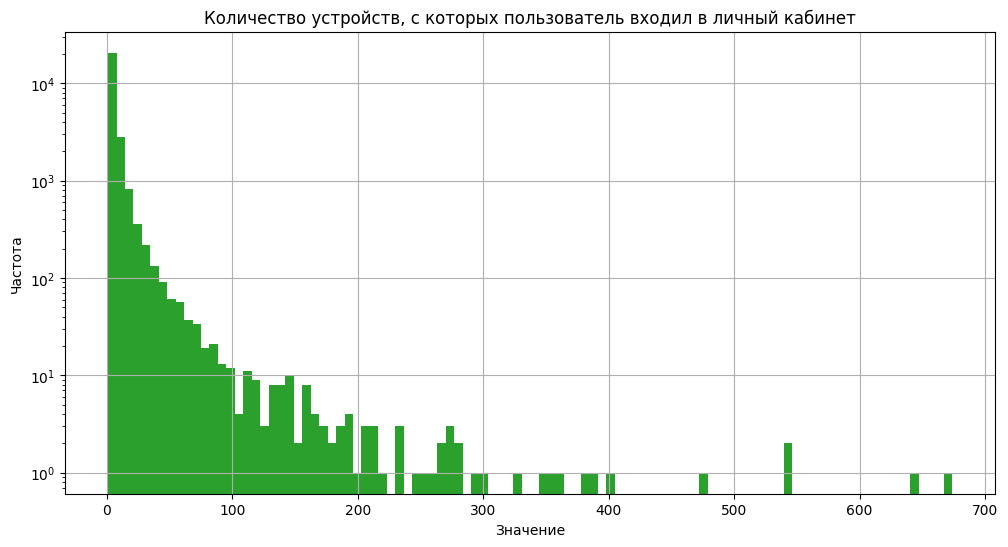

1927     674
14553    647
3067     542
18597    540
17874    475
Name: platform_num, dtype: int64

count    25335.000000
mean         6.469982
std         17.016845
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        674.000000
Name: platform_num, dtype: float64

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["platform_num"].hist(bins=100, log=True)

plt.title("Количество устройств, с которых пользователь входил в личный кабинет")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

display(df["platform_num"].nlargest())
display(df["platform_num"].describe())

* Для избавления от наиболее экстримальных значений, возьмем квантиль уровня `0.99`, снизив показатель максимума платформ до 60. 

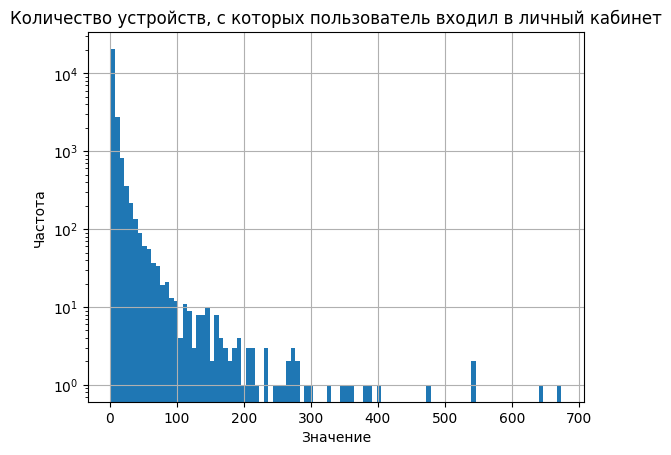

Количество подозрительных значений платформ по 99 %-ому квантилю: 250
Сопоставление количества аккаунтов до 10 устройств и более: 21823 | 3512


count    25335.000000
mean         6.469982
std         17.016845
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max        674.000000
Name: platform_num, dtype: float64

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0
2,user_000002,5,2025-01-19,2025-01-23,browser_02,2025-02-20,0.3,194.612980,485.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaN,0.0,138.780814,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0


In [118]:
quant = df["platform_num"].quantile(0.99)

platform_tail_count = (df["platform_num"] > quant).sum()
#df = df[df["platform_num"] < quant]

df["platform_num"].hist(bins=100, log=True)

plt.title("Количество устройств, с которых пользователь входил в личный кабинет")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

print(f"Количество подозрительных значений платформ по 99 %-ому квантилю: {platform_tail_count}")

before_target, after_target = (df["platform_num"] < 10).value_counts().values
print(f"Сопоставление количества аккаунтов до 10 устройств и более: {before_target} | {after_target}")

display(df["platform_num"].describe())
display(df.head())

Краткий итог:
1. Избавление от `250` экстримальных значений привело среднее и стандартное отклонение к сопоставимым показателям.
2. Большинство пользователей использует 6 или менее платформ
3. Однако, доля пользователей, превышающих установленный "не подозрительный" порог в 10 устройств, равна `~14.9%`

### Работа с `total_buy` и `total_return`

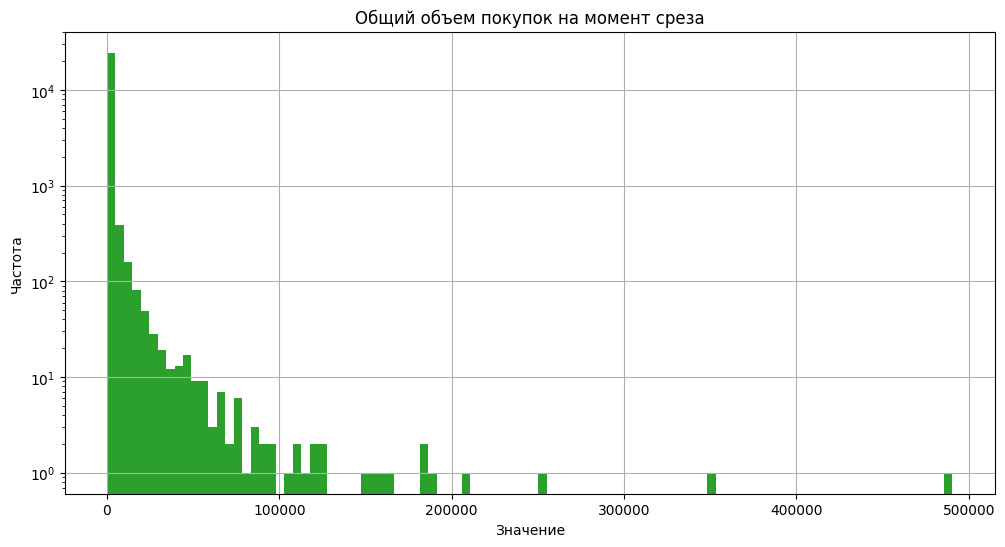

count     25335.000000
mean        898.549417
std        6815.549317
min           0.000000
25%          19.359396
50%          52.715792
75%         203.526684
max      490447.985326
Name: total_buy, dtype: float64

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["total_buy"].hist(bins=100, log=True)

plt.title("Общий объем покупок на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["total_buy"].describe()

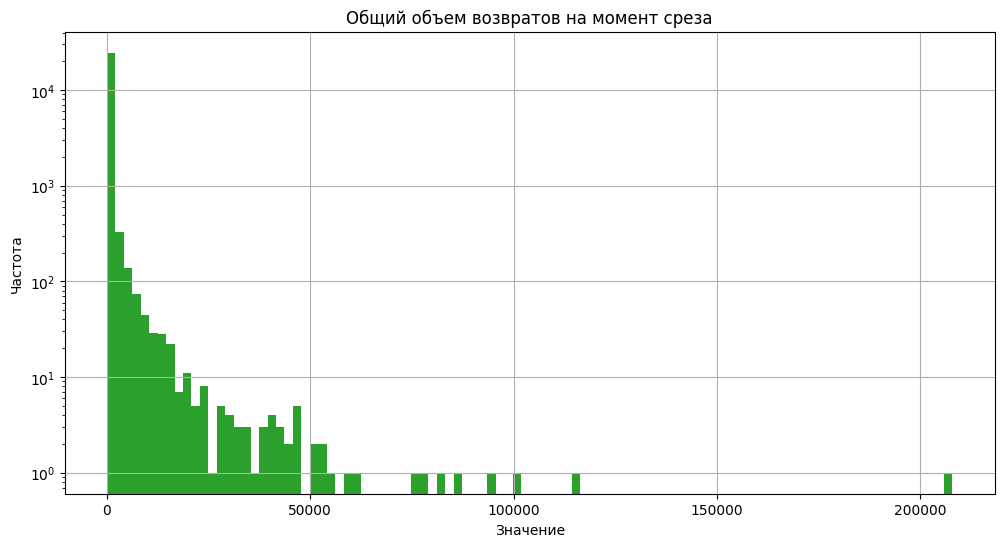

count     25335.000000
mean        334.082448
std        2882.914996
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      207893.840000
Name: total_return, dtype: float64

In [120]:
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["total_return"].hist(bins=100, log=True)

plt.title("Общий объем возвратов на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["total_return"].describe()

In [121]:
# проверка на наличие записей, где сумма покупок меньше суммы возвратов (чего в принципе невозможно)
buys_lt_return = df["total_buy"] < df["total_return"]

print("Сумма покупок меньше суммы возвратов:", buys_lt_return.sum())

# удаление этих записей
df = df.drop(df[buys_lt_return].index)


Сумма покупок меньше суммы возвратов: 1981


In [122]:
# сколько значений в хвосте каждой суммы, сосредоточенных в 1%
buys_tail_count = (df["total_buy"] > df["total_buy"].quantile(0.99)).sum()
return_tail_count = (df["total_return"] > df["total_return"].quantile(0.99)).sum()

print(f"Экстримальных значений для суммы покупок: {buys_tail_count}")
print(f"Экстримальных значений для суммы возвратов: {return_tail_count}")

Экстримальных значений для суммы покупок: 234
Экстримальных значений для суммы возвратов: 234


In [123]:
df[["total_buy", "total_return"]].describe()

,total_buy,total_return
count,23354.000000,23354.000000
mean,942.320389,308.598894
std,7078.597299,2922.828047
min,0.000000,0.000000
25%,19.744165,0.000000
50%,52.714576,0.000000
75%,206.537386,0.000000
max,490447.985326,207893.840000


Краткий итог:  
1. Итоговая сумма покупок и возвратов вполне может иметь _накопленный_ _"вес"_ равный максимумам `350469` и `114583` соответственно (то есть, это не разовые транзакции), поэтому назвать эти данные выбросами нельзя.
2. Для "сглаживания" данных можно применить логарифмичиское преобразование или отсечь длинный правый хвост с наиболее редкими и искажающими событиями (`232` строк для каждой из сумм).

### Работа с датами: `first_login`, `reg_dt` и `first_buy`

In [124]:
# преобразование в datetime для удобной работы и вычислений
date_columns = ["reg_dt", "first_buy", "first_login"]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

# статистика дат
print("Статистика 'first_login':")
display(df["first_login"].describe())
print("Статистика 'reg_dt':")
display(df["reg_dt"].describe())
print("Статистика 'first_buy':")
display(df["first_buy"].describe())

Статистика 'first_login':


count                            23354
mean     2025-03-15 14:20:20.244925952
min                2024-09-21 00:00:00
25%                2025-02-10 00:00:00
50%                2025-03-24 00:00:00
75%                2025-04-27 00:00:00
max                2025-07-26 00:00:00
Name: first_login, dtype: object

Статистика 'reg_dt':


count                            23350
mean     2024-12-08 22:43:39.134903552
min                2022-10-12 00:00:00
25%                2024-10-14 00:00:00
50%                2025-02-19 00:00:00
75%                2025-04-21 00:00:00
max                2025-07-26 00:00:00
Name: reg_dt, dtype: object

Статистика 'first_buy':


count                         22443
mean     2025-03-13 20:57:00.505280
min             2023-08-08 00:00:00
25%             2025-02-13 00:00:00
50%             2025-03-26 00:00:00
75%             2025-05-03 00:00:00
max             2025-07-25 00:00:00
Name: first_buy, dtype: object

In [125]:
buys_without_first_buy_dt = df[(df["total_buy"] > 0) & (df["first_buy"].isna())]

print(f"Количество строк, где есть сумма покупок, но нет даты первой покупки: {buys_without_first_buy_dt["user_id"].count()}")

Количество строк, где есть сумма покупок, но нет даты первой покупки: 881


In [126]:
after_dates = ["reg_after_login", "login_after_buy", "reg_after_buy"]

diff_with_first_login_date = df["first_login"] - df["reg_dt"]
df["reg_after_login"] = diff_with_first_login_date.dt.days < 0

diff_with_first_login_date = df["first_buy"] - df["first_login"]
df["login_after_buy"] = diff_with_first_login_date.dt.days < 0

diff_with_reg_date = df["first_buy"] - df["reg_dt"]
df["reg_after_buy"] = diff_with_reg_date.dt.days < 0

print(f"Дата регистрация позже первого логина для {df["reg_after_login"].sum()} записей")
print(f"Дата первого логина позже первой покупки для {df["login_after_buy"].sum()} записей")
print(f"Дата регистрации позже первой покупки для {df["reg_after_buy"].sum()} записей")

display(df[after_dates].head(10))

Дата регистрация позже первого логина для 7952 записей
Дата первого логина позже первой покупки для 9345 записей
Дата регистрации позже первой покупки для 6927 записей


,reg_after_login,login_after_buy,reg_after_buy
0,False,False,False
1,True,False,False
3,False,False,False
4,True,False,True
5,False,False,False
6,False,True,False
7,False,True,False
8,False,False,False
10,True,False,False
11,False,False,False


Краткий вывод:
1. Даты выглядят наиболее некорректными, так как имеют логическое противоречие бизнес-логике (если предположить невозможность совершить покупку без регистрации или отсутствие гостевого входа):
- есть сумма покупок, но нет даты первой покупки для 881 записb
- дата регистрация позже первого логина для 7884 записей
- дата первого логина позже первой покупки для 9236 записей
- дата регистрации позже первой покупки для 6858 записей
2. Да, данные некорректные и занимают примерно 40% от всего объема. Мы их оставили, но для удобства присвоили метки о несоответствии. Для проверки некоторых гипотез это может быть критично.

## Создание дополнительных признаков

1. Признаки на основе дат  
- `diff_with_first_login` - интервал от первого логина до первой покупки
- `diff_with_reg_date` - интервал от регистрации до первой покупки

In [127]:
# для значений Nan и полученных отрицательных дат, присваиваем значение -1
df["diff_with_first_login"] = np.where(
    (df["first_buy"].notna()) & ((df["first_buy"] - df["first_login"]).dt.days > 0),
    (df["first_buy"] - df["first_login"]).dt.days,
    -1,
)

display(df["diff_with_first_login"].head())

df["diff_with_reg_date"] = np.where(
    (df["first_buy"].notna()) & ((df["first_buy"] - df["reg_dt"]).dt.days > 0),
    (df["first_buy"] - df["reg_dt"]).dt.days,
    -1,
)

display(df["diff_with_reg_date"].head())


0    -1.0
1    15.0
3    -1.0
4     6.0
5     3.0
Name: diff_with_first_login, dtype: float64

0    217.0
1      5.0
3     -1.0
4     -1.0
5    297.0
Name: diff_with_reg_date, dtype: float64

In [128]:
# группировка по времени, прошедшему с момента регистрации и первой покупкой
timing_bins = [-np.inf, 0, 8, np.inf]
timing_labels = [
    "reg_before_buys",
    "within_week",
    "long_delay",
]
df["reg_login_timing"] = pd.cut(
    df["diff_with_reg_date"],
    bins=timing_bins,
    labels=timing_labels,
    right=False,
)

display(df.head())

within_week_count = (df["reg_login_timing"] == "within_week").sum()
long_delay_count = (df["reg_login_timing"] == "long_delay").sum()

print(f"Интервал между регистрацией и покупкой ДО 7 дней: {within_week_count}")
print(f"Интервал между регистрацией и покупкой СВЫШЕ 7 дней: {long_delay_count}")

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return,reg_after_login,login_after_buy,reg_after_buy,diff_with_first_login,diff_with_reg_date,reg_login_timing
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0,False,False,False,-1.0,217.0,long_delay
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0,True,False,False,15.0,5.0,within_week
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaT,0.0,138.780814,0.0,False,False,False,-1.0,-1.0,reg_before_buys
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0,True,False,True,6.0,-1.0,reg_before_buys
5,user_000005,7,2025-03-27,2024-06-06,browser_02,2025-03-30,0.3,504.585202,0.0,False,False,False,3.0,297.0,long_delay


Интервал между регистрацией и покупкой ДО 7 дней: 4274
Интервал между регистрацией и покупкой СВЫШЕ 7 дней: 10496


2. Признаки для группировки
- `platform_num_group` - присвоение группы в зависимости от количества устройств
- `unexpected_platform_num` - присвоение True, если количество больше разумного

In [129]:
# разбиение на группы по количеству используемых устройств
platform_bins = [1, 8, np.inf]
platform_labels = ["low", "high"]
df["platform_num_group"] = pd.cut(
    df["platform_num"],
    bins=platform_bins,
    labels=platform_labels,
    right=False,
)

display(df[["platform_num", "platform_num_group"]].head(10))


# добавление метки о подозрительном количестве устройств
trigger = 10
df["unexpected_platform_num"] = df["platform_num"] >= trigger

display(df[["platform_num", "unexpected_platform_num"]].head())

,platform_num,platform_num_group
0,12,high
1,1,low
3,3,low
4,1,low
5,7,low
6,4,low
7,6,low
8,3,low
10,4,low
11,5,low


,platform_num,unexpected_platform_num
0,12,True
1,1,False
3,3,False
4,1,False
5,7,False


* `browser_group_by_count` - группировка по количеству пользователей браузерами

In [130]:
browser_counts = df.groupby("browser")["user_id"].transform("count")

browser_bins = [1, 3000, 8000, float("inf")]
browser_labels = ["low", "medium", "high"]

df["browser_group_by_count"] = pd.cut(
    browser_counts,
    bins=browser_bins,
    labels=browser_labels,
    right=False,
)

display(df["browser_group_by_count"].head(18))

low_group_count = (df["browser_group_by_count"] == "low").sum()
medium_group_count = (df["browser_group_by_count"] == "medium").sum()
high_group_count = (df["browser_group_by_count"] == "high").sum()

print(f"Пользователей в браузерами в группе 'low': {low_group_count}")
print(f"Пользователей в браузерами в группе 'medium': {medium_group_count}")
print(f"Пользователей в браузерами в группе 'high': {high_group_count}")

0        low
1     medium
3       high
4        low
5       high
6       high
7     medium
8     medium
10    medium
11    medium
12    medium
13      high
14    medium
15       low
16      high
17       low
18       low
19      high
Name: browser_group_by_count, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

Пользователей в браузерами в группе 'low': 5464
Пользователей в браузерами в группе 'medium': 9053
Пользователей в браузерами в группе 'high': 8837


3. Отношение суммы возврата, покупок. Совершались ли возвраты

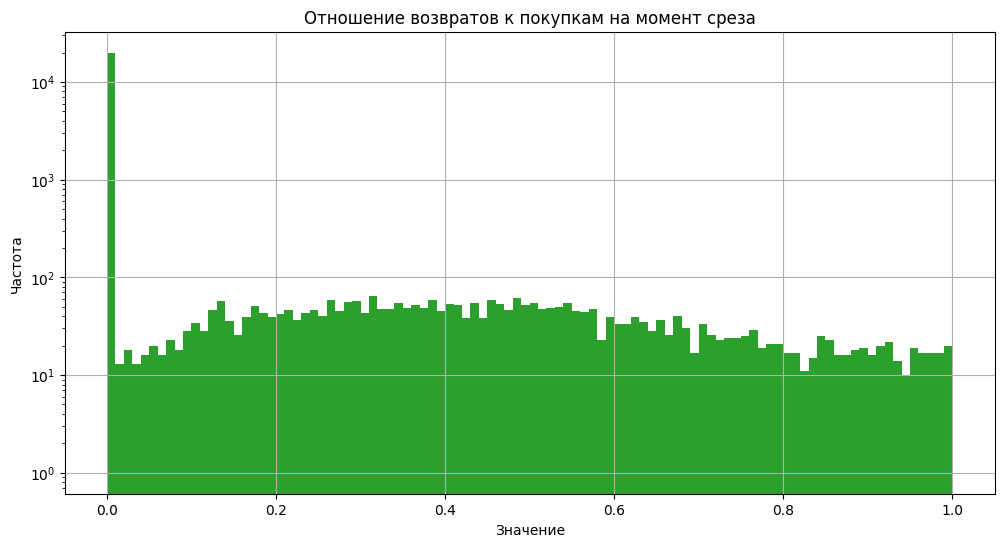

count    23354.000000
mean         0.066247
std          0.184454
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.999871
Name: current_target, dtype: float64

In [131]:
df["current_target"] = np.where(
    df["total_buy"] != 0, 
    (df["total_return"] / df["total_buy"]), 
    0
)

plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)

df["current_target"].hist(bins=100, log=True)

plt.title("Отношение возвратов к покупкам на момент среза")
plt.xlabel("Значение")
plt.ylabel("Частота")

plt.show()

df["current_target"].describe()

In [132]:
display(df.head())
display(df.describe())

,user_id,platform_num,first_login,reg_dt,browser,first_buy,target,total_buy,total_return,reg_after_login,login_after_buy,reg_after_buy,diff_with_first_login,diff_with_reg_date,reg_login_timing,platform_num_group,unexpected_platform_num,browser_group_by_count,current_target
0,user_000000,12,2025-03-22,2024-08-17,browser_00,2025-03-22,0.0,85.329559,0.0,False,False,False,-1.0,217.0,long_delay,high,True,low,0.0
1,user_000001,1,2025-05-05,2025-05-15,browser_01,2025-05-20,0.0,21.819124,0.0,True,False,False,15.0,5.0,within_week,low,False,medium,0.0
3,user_000003,3,2025-03-15,2023-09-05,browser_02,NaT,0.0,138.780814,0.0,False,False,False,-1.0,-1.0,reg_before_buys,low,False,high,0.0
4,user_000004,1,2025-05-05,2025-05-14,browser_00,2025-05-11,0.0,16.334507,0.0,True,False,True,6.0,-1.0,reg_before_buys,low,False,low,0.0
5,user_000005,7,2025-03-27,2024-06-06,browser_02,2025-03-30,0.3,504.585202,0.0,False,False,False,3.0,297.0,long_delay,low,False,high,0.0


,platform_num,first_login,reg_dt,first_buy,target,total_buy,total_return,diff_with_first_login,diff_with_reg_date,current_target
count,23354.000000,23354,23350,22443,23354.000000,23354.000000,23354.000000,23354.000000,23354.000000,23354.000000
mean,6.458979,2025-03-15 14:20:20.244925952,2024-12-08 22:43:39.134903552,2025-03-13 20:57:00.505280,0.004737,942.320389,308.598894,8.072022,88.945962,0.066247
min,1.000000,2024-09-21 00:00:00,2022-10-12 00:00:00,2023-08-08 00:00:00,-3.428557,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,2.000000,2025-02-10 00:00:00,2024-10-14 00:00:00,2025-02-13 00:00:00,0.000000,19.744165,0.000000,-1.000000,-1.000000,0.000000
50%,3.000000,2025-03-24 00:00:00,2025-02-19 00:00:00,2025-03-26 00:00:00,0.000000,52.714576,0.000000,1.000000,5.000000,0.000000
75%,6.000000,2025-04-27 00:00:00,2025-04-21 00:00:00,2025-05-03 00:00:00,0.000000,206.537386,0.000000,9.000000,40.000000,0.000000
max,674.000000,2025-07-26 00:00:00,2025-07-26 00:00:00,2025-07-25 00:00:00,0.300000,490447.985326,207893.840000,275.000000,999.000000,0.999871
std,17.218060,NaN,NaN,NaN,0.234553,7078.597299,2922.828047,19.961470,191.290564,0.184454


# Гипотезы

### Гипотеза №1.

Пользователи с высокой долей возвратов на момент среза (`current_target`), будут иметь высокий прогнозируемый показатель возвратов (`target`) в будущем.

### Гипотеза №2*.

Низкая вовлеченность пользователя: чем больше интервал между первой покупкой и регистрацией, тем ниже изначальная заинтересованность, что увеличивает вероятность возврата. Сравнение по группам интервалов: "_до 7 дней_" | "_после_" - есть ли статистически значимые различия `target` между этими группами.

*В ходе анализа данных было выявлено, что для `~35%` строк данных, дата первой покупки наступила раньше, чем дата регистрации пользователя. Для корректности и полноты проверки других гипотез, эти данные не были преобразованы или удалены. Но для данной гипотезы эти искажения критичны, потому не будут учитываться, исходя из предположения, что нельзя оформить покупку без регистрации в сервисе.

### Гипотеза №3.

В зависимости от принадлжености к группе по количеству используемых платформ (`platform_num_group`): для категории с низким количеством платформ входа, показатель сумма возвратов/сумма покупок будет меньше, чем у группы с большим количеством платформ входа.

### Гипотеза №4.

В зависимости от принадлжености к группе браузеров в разрезе количества пользователей (`browser_group_by_count`): пользователи определенной группы имеют больший показатель возвратов, чем другие.

## Гипотеза №3.

В зависимости от принадлжености к группе по количеству используемых платформ (`platform_num_group`): 
для категории с низким количеством платформ входа,
показатель сумма возвратов/сумма покупок будет меньше, чем у группы с большим количеством платформ входа.

### Подготовка данных.

В рамках данной гипотезы будем рассматривать тех пользователей, у которых current_target отличен от 0, т.к. нулевые значения влияют на центральные характеристики мешая проверке данной гипотезы. (например если мы будем сравнивать среднии, то наличие большого количество пользователей с нулевым current_target в некоторой группе, приведет к неверным заключениям даже если в этой группе высокий показатель возврат/покупка)

In [ ]:
thesis_3 = df.copy(deep=True)
thesis_3 = thesis_3[thesis_3['current_target'] != 0]

### Анализ графика зависимости среднего current_target от platform_num.

Из графика (ниже) зависимости среднего current_target от platform_num не видно, что с ростом количества платформ увеличивается среднее отношения возврат/покупка 


/tmp/ipykernel_6698/160922407.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='platform_num', y='current_target', data=mean_return_rates, palette="viridis")


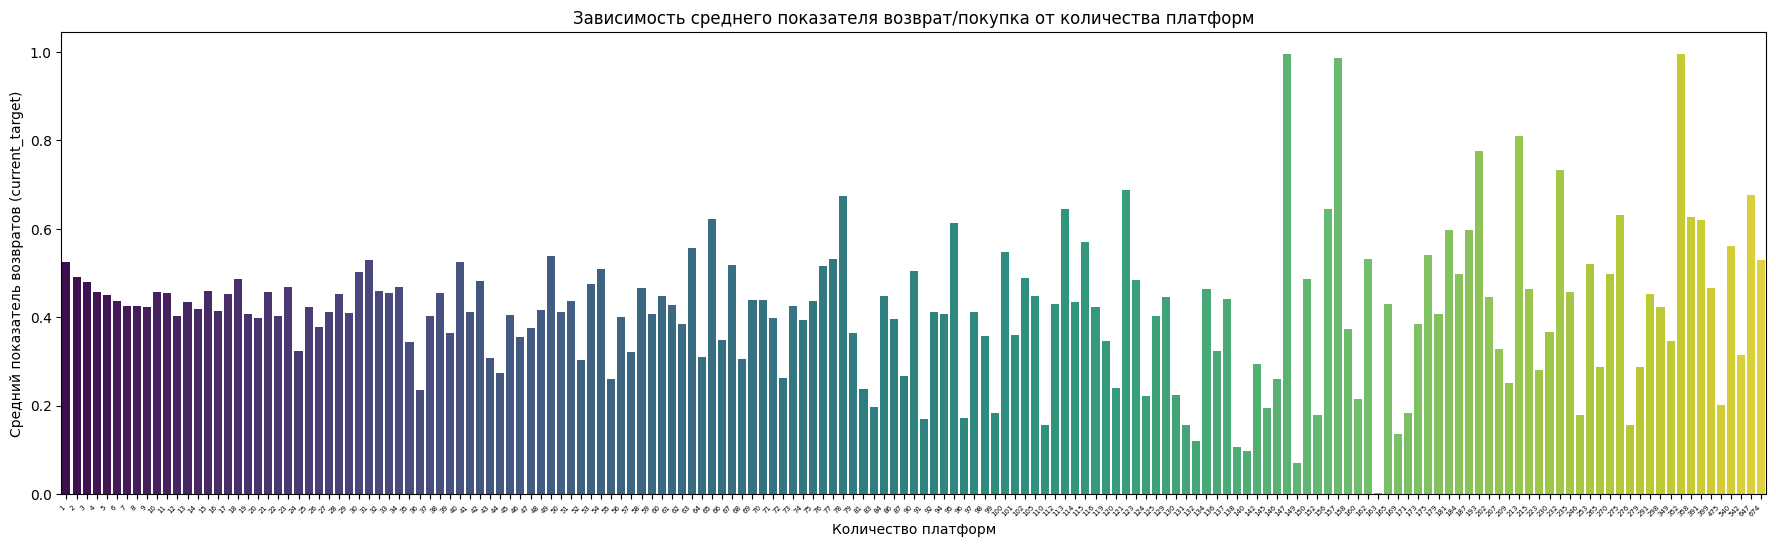

In [133]:
mean_return_rates = thesis_3.groupby('platform_num')['current_target'].mean().reset_index()
plt.figure(figsize=(22, 6))

sns.barplot(x='platform_num', y='current_target', data=mean_return_rates, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xticks(fontsize=5) 
plt.title('Зависимость среднего показателя возврат/покупка от количества платформ')
plt.xlabel('Количество платформ')
plt.ylabel('Средний показатель возвратов (current_target)')
plt.show()

### Построение нулевой и альтернативной гипотез.

Мы соформировали две группы пользователей приняв, что группу до 8 устройст составляют те, кто единолично используют аккаунт, а группу более 8 устройст составляют "Семейные аккаунты" с которых сидит несколько человек или аккаунты конкурентов, перекупщиков и тд.

Для следующих статистических тестов примем в качестве нулевой гипотезы (c учетом, того, что разные тесты смотрят на разные центральные показатели групп: среднее (Anova), медиана (Краскела — Уоллиса)):

1. H0 - Не существует различий в выбранной центральной мере возврат/покупка (`current_target`) между группами.
2. H1 - Имеются существенные различия в выбранной центральной мере возврат/покупка (`current_target`) между группами.

В ходе тестирования мы хотим проанализировать группы на предмет различий в центральных показателях, поэтому примеными тесты ANOVA и Краскела — Уоллиса.


### Выбор уровня значимости.

Примем уровень значимости на уровне `alpha = 0.05`

### Выбор статистического теста.

Так как нам необходимо найти различия центральных харктеристик двух групп попробуем применить тесты
1. ANOVA
2. H-критерий Краскела — Уоллиса

### Анализ на предмет применимости теста ANOVA. 

Для данного теста необходимо чтобы:
1. Распределения были нормальными.
2. Их std равны. 

/tmp/ipykernel_6698/1088504681.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group_name, group_df in thesis_3.groupby('platform_num_group'):


group name: low, std: 0.2499344542624074
group name: high, std: 0.22135236958800977


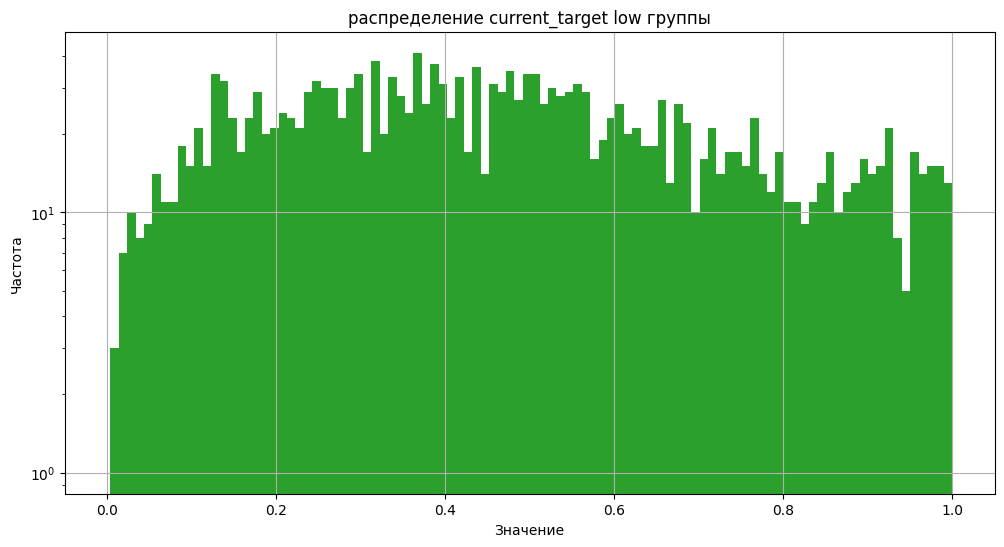

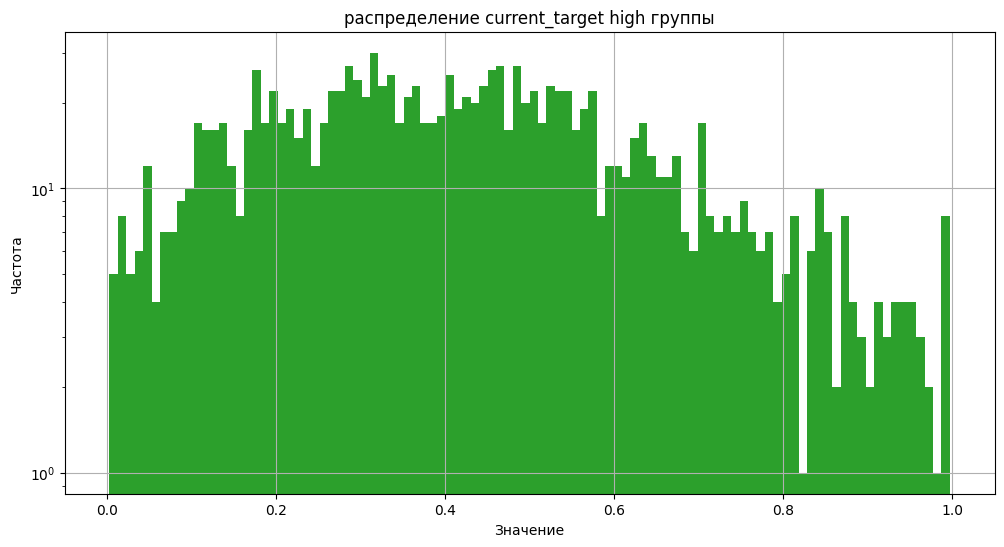

Средний current_target для групп low: 0.4705174349880547, height: 0.423808498857109 height/low: 0.9007285752713253
ANOVA p_value 2.6760880944304105e-08


In [142]:
groupename_values = {}
groupename_std = {}
for group_name, group_df in thesis_3.groupby('platform_num_group'):
    groupename_values[group_name] = group_df['current_target'].values
    current_std = group_df['current_target'].std()
    groupename_std[group_name] = current_std
    print(f'group name: {group_name}, std: {current_std}')

# Тест ANOVA

#для данного теста требуется равенство std групп и их нормальные распределения.
#std current_target анализируемых групп не сильно отличаются друг от друга, однако распределения групп не явдяются нормальными.
plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)
thesis_3[thesis_3['platform_num_group'] == 'low']['current_target'].hist(bins=100, log=True)
plt.title("распределение current_target low группы")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(1, 2, 1)
thesis_3[thesis_3['platform_num_group'] == 'high']['current_target'].hist(bins=100, log=True)
plt.title("распределение current_target high группы")
plt.xlabel("Значение")
plt.ylabel("Частота")
plt.show()

# поскольку распределения не являются нормальными данный тест не применим
# однако обратим внимание на среднии current_target по группам 
print(f"Средний current_target для групп low: {groupename_values['low'].mean()}, height: {groupename_values['high'].mean()} height/low: {groupename_values['high'].mean()/groupename_values['low'].mean()}")

f_statistic, p_value = stats.f_oneway(groupename_values['low'], groupename_values['high'])

print(f'ANOVA p_value {p_value}')

std current_target анализируемых групп не сильно отличаются друг от друга, однако распределения групп не явдяются нормальными, поэтому тест ANOVA нельзя применить, однако можно заметить, что среднии значения current_target по группам отличаются не значительно. 

### Тест H-критерий Краскела — Уоллиса.

In [141]:
#Посколько Anova не применим, ограничимся тестом "H-критерий Краскела — Уоллиса", показывающий наличие разницы медиан групп

h_statistic, p_value = stats.kruskal(groupename_values['low'], groupename_values['high'])

print(f'kruskal h-statistic: {h_statistic}, p-value: {p_value:.4e}')


kruskal h-statistic: 24.224057076064128, p-value: 8.5754e-07


### Сравнение p-value c уровнем значимости и вывод.

1. Из анализа графика зависимости среднего отношения возварт/покупка не видим заметного увеличение данного отношения с ростом количества платформ.
2. Значения `p-value`, меньшее 0.05 подтверждает гипотезу, однако это объясняется большим объёмом выборки и не отражает эффект от теста.
3. Отношение средних `current_target` между группыми с большим количеством платформ входа и меньшим - около 0.9, т.е. не значительно.

Таким образом можно сделать вывод, что нет существенной разницы в привлекательности с точки зрения предложения рекламы между данными группами.


### Визуализация

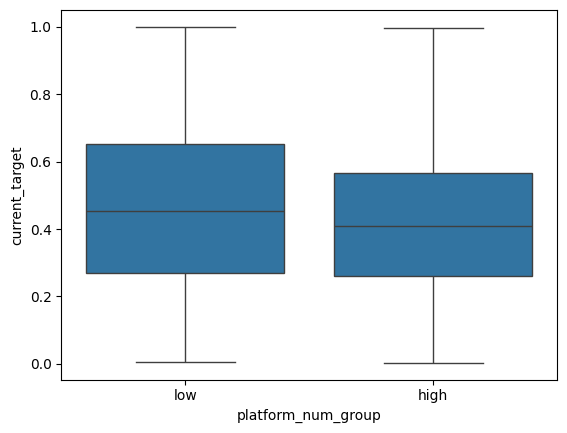

In [136]:
# Создание вертикального боксплота
sns.boxplot(x='platform_num_group', y='current_target', data=thesis_3, showfliers=False)
plt.show()